## Analysis of American Football betting and Superbowl Winners
##### Collaborators: Nicole Tran, Azwa Bajwah, and Evelyn Zhao

Directions: In general, the tutorial should contain at least 1500 words of prose (excluding the comments) and 150 lines of (nonpadded, legitimate) Python code, along with appropriate documentation, visualization, and links to any external information that might help the reader. 

Grading
1. Motivation. Does the tutorial make the reader believe the topic is relevant or important (i) in
general and (ii) with respect to data science?
2. Understanding. After reading through the tutorial, does an uninformed reader feel informed about
the topic? Would a reader who already knew about the topic feel like s/he learned more about it?
3. Other resources. Does the tutorial link out to other resources (on the web, in books, etc) that
would give a lagging reader additional help on specific topics, or an advanced reader the ability to
dive more deeply into a specific application area or technique?
4. Prose. Does the prose portion of the tutorial actually add to the content of the deliverable?
5. Code. Is the code well written, well documented, reproducible, and does it help the reader understand
the tutorial? Does it give good examples of specific techniques?
6. Subjective evaluation. If somebody linked to this tutorial from, say, Hacker News, would people
actually read through the entire thing

### Introduction
Every year in early-Febuary no matter who or where you are in America, you will most likely always hear about the Super Bowl. The Super Bowl is one of the largest broadcasted events in the United States and [in 2024 generated over 123.4 million viewers](https://www.statista.com/statistics/216526/super-bowl-us-tv-viewership/#:~:text=123%20million%20viewers%20in%20the%20United%20States%2C%20making%20it%20not%20only%20the%20most%20watched%20Super%20Bowl%20in%20history%2C%20but%20also%20the%20most%20popular%20TV%20program%20of%20all%20time%20in%20the%20U.S.) with over a billion dollars in revenue from ticket sales, advertisement, and broadcasting alone. That revenue is not including the billions of dollars in economic profit which also come from local businesses and betting. The Super Bowl is notably one of [the largest and most profitable sports betting events]() in America. Every year millions of Americans bet billions of dollars all together on one match. For many people football betting is a sport, hobby, and career for which there is lots to gain and win within hours. Therefore it is important to make informed decisions based on previous years of betting as well as statitics of teams and winnings. This is where data science is extremely useful, using a collection of data we can use algorithms and statistics to analyze previous bettings and provide useful information for following Super Bowls.

Over this tutorial, we will be going through the following:
1. Data Collection
2. Data Processing
3. Exploratory Analysis & Data Visualization
4. Modeling: Analysis, Hypothesis Testing, & Machine Learning
5. Interpretation: Insight & Next Steps

### Data Collection

At this stage, we must find an appropriate dataset relevant to the NFL and Superbowl winners.

Kaggle is a free to use site for data scientists to publish and share datasets and participate in data science challenges and competitions. There are a lot of well cleaned and sourced datasets collected by data scientists around the world, and we selected a relevent dataset for use in our project. Check out Kaggle [here!](https://www.kaggle.com/)

---

During this project, we will be using Python language, and we use tools such as Jupiter Notebook to develop this project. If you haven't heard about Jupiter notebooks before, make sure to learn more about them [here](https://jupyter.org/).

First, we start by importing libraries used for data collection and analysis.

#### Imports

In [237]:
import sqlite3 as sql
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from plotnine import *
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


You will see how each of these imports will help collect, analyze, and display data as you complete this tutorial.

### Data Processing

You can see from the csv files provided from the Kaggle dataset are completely unreadable in their original form. Now that we have our imports, let's extract the csv file into [pandas dataframes](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html). This will allow us much more freedom when it comes to manipulating tabular data.

In [238]:
# stadium_data = pd.read_csv('nfl_stadiums.csv', encoding='ISO-8859-1')
team_data = pd.read_csv('nfl_teams.csv', encoding='ISO-8859-1')
scores_data = pd.read_csv('spreadspoke_scores.csv', encoding='ISO-8859-1')

In [239]:
# not really useful
# stadium_data.head(10)

Take a look at the team data. We will only need this dataframe to match the team name to the team ID.

In [240]:
team_data.head(10)

,team_name,team_name_short,team_id,team_id_pfr,team_conference,team_division,team_conference_pre2002,team_division_pre2002
0,Arizona Cardinals,Cardinals,ARI,CRD,NFC,NFC West,NFC,NFC West
1,Atlanta Falcons,Falcons,ATL,ATL,NFC,NFC South,NFC,NFC West
2,Baltimore Colts,Colts,IND,CLT,AFC,NaN,AFC,AFC East
3,Baltimore Ravens,Ravens,BAL,RAV,AFC,AFC North,AFC,AFC Central
4,Boston Patriots,Patriots,NE,NWE,AFC,NaN,AFC,NaN
5,Buffalo Bills,Bills,BUF,BUF,AFC,AFC East,AFC,AFC East
6,Carolina Panthers,Panthers,CAR,CAR,NFC,NFC South,NFC,NFC West
7,Chicago Bears,Bears,CHI,CHI,NFC,NFC North,NFC,NFC Central
8,Cincinnati Bengals,Bengals,CIN,CIN,AFC,AFC North,AFC,AFC Central
9,Cleveland Browns,Browns,CLE,CLE,AFC,AFC North,AFC,AFC Central


We will primarily use and break off of the scores dataframe, named scores_data.

In [241]:
scores_data.head(10)

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
0,9/2/1966,1966,1,False,Miami Dolphins,14,23,Oakland Raiders,NaN,NaN,NaN,Orange Bowl,False,83.0,6.0,71.0,NaN
1,9/3/1966,1966,1,False,Houston Oilers,45,7,Denver Broncos,NaN,NaN,NaN,Rice Stadium,False,81.0,7.0,70.0,NaN
2,9/4/1966,1966,1,False,San Diego Chargers,27,7,Buffalo Bills,NaN,NaN,NaN,Balboa Stadium,False,70.0,7.0,82.0,NaN
3,9/9/1966,1966,2,False,Miami Dolphins,14,19,New York Jets,NaN,NaN,NaN,Orange Bowl,False,82.0,11.0,78.0,NaN
4,9/10/1966,1966,1,False,Green Bay Packers,24,3,Baltimore Colts,NaN,NaN,NaN,Lambeau Field,False,64.0,8.0,62.0,NaN
5,9/10/1966,1966,2,False,Houston Oilers,31,0,Oakland Raiders,NaN,NaN,NaN,Rice Stadium,False,77.0,6.0,82.0,NaN
6,9/10/1966,1966,2,False,San Diego Chargers,24,0,New England Patriots,NaN,NaN,NaN,Balboa Stadium,False,69.0,9.0,81.0,NaN
7,9/11/1966,1966,1,False,Atlanta Falcons,14,19,Los Angeles Rams,NaN,NaN,NaN,Atlanta-Fulton County Stadium,False,71.0,7.0,57.0,NaN
8,9/11/1966,1966,2,False,Buffalo Bills,20,42,Kansas City Chiefs,NaN,NaN,NaN,War Memorial Stadium,False,63.0,11.0,73.0,NaN
9,9/11/1966,1966,1,False,Detroit Lions,14,3,Chicago Bears,NaN,NaN,NaN,Tiger Stadium,False,67.0,7.0,73.0,NaN


### Explaining some columns:
You may read this [Fox Sports article](https://shahsean.github.io/#https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Notebook%20Basics.html) on NFL betting to learn more.

#### spread_favorite
In football betting, the term "spread favorite" refers to the team that is expected to win by a certain number of points as set by the betting odds. This team is typically considered stronger or in a better position to win the game, and the "spread" is the number of points bookmakers estimate by which the favorite is expected to outscore the underdog.

Example of a Point Spread Bet:
Suppose in an NFL game, the Green Bay Packers are playing against the Detroit Lions. If the Packers are listed as the "spread favorite," the listing might look something like this:

- Green Bay Packers -7.5
- Detroit Lions +7.5

This means that the Packers are favored to win by more than 7.5 points. For a bet on the Packers to pay out, they must win by 8 points or more. Conversely, a bet on the Lions would win if the Lions lose by 7 points or fewer, or if they win the game outright.

#### over_under_line
In football betting, the "over/under" line, also known as the total, is a wager on the combined score of both teams in a game. This betting line sets a predicted total score by the oddsmakers, and bettors can wager whether the actual combined score of the game will be over or under that set number.

Example of an Over/Under Bet:
Suppose in an NFL game between the New England Patriots and the Miami Dolphins, the over/under line is set at 47.5 points. Here are the betting options:

- Over 47.5 Points: If you bet the over, you are predicting that the combined score of both teams will be 48 points or more.
- Under 47.5 Points: If you bet the under, you are predicting that the combined score will be 47 points or fewer.

If the final combined score is 48 points or more, the over bets win. If it is 47 points or fewer, the under bets win.

#### schedule_week
In this data set, the schedule week is usually a number. However, superbowl games are labeled as "Superbowl" in the schedule_week column.

### List of SuperBowl Winners:
https://www.espn.com/nfl/superbowl/history/winners

### Cleaning


Now, to make data comparison a little easier, let's change team_favorite_id (the favored team for the game, labed by its ID) to just team_favorite. We will need to use a column from the teams_data dataframe to know which team ID corresponds to which team name.

In [242]:
# make a mapping dictionary. this will be a map that points the team id to the team name
mapping = team_data.set_index('team_id_pfr')['team_name'].to_dict()

# create a column called team_favorite
scores_data['team_favorite'] = scores_data['team_favorite_id'].map(mapping)

# drop the old column, team_favorite_id
scores_data.drop(columns='team_favorite_id', inplace=True)

Let's continue cleaning this dataframe by making a column that clearly states who won the game. Right now, this dataset only shows the home team, the away team, the home team score, and the away team score. It would be annoying to constantly calculate who won each game by comparing scores, so let's make a whole new column called winning_team that shows who won the game.

In [243]:
# make a function to compare the score_home and score_away
# returns the winning team
def determine_winner(row):
    if row['score_home'] > row['score_away']:
        return row['team_home']
    else:
        return row['team_away']

scores_data['winning_team'] = scores_data.apply(determine_winner, axis=1)

Our dataframe now looks like this:

In [244]:
scores_data

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,team_favorite,winning_team
0,9/2/1966,1966,1,False,Miami Dolphins,14,23,Oakland Raiders,NaN,NaN,Orange Bowl,False,83.0,6.0,71.0,NaN,NaN,Oakland Raiders
1,9/3/1966,1966,1,False,Houston Oilers,45,7,Denver Broncos,NaN,NaN,Rice Stadium,False,81.0,7.0,70.0,NaN,NaN,Houston Oilers
2,9/4/1966,1966,1,False,San Diego Chargers,27,7,Buffalo Bills,NaN,NaN,Balboa Stadium,False,70.0,7.0,82.0,NaN,NaN,San Diego Chargers
3,9/9/1966,1966,2,False,Miami Dolphins,14,19,New York Jets,NaN,NaN,Orange Bowl,False,82.0,11.0,78.0,NaN,NaN,New York Jets
4,9/10/1966,1966,1,False,Green Bay Packers,24,3,Baltimore Colts,NaN,NaN,Lambeau Field,False,64.0,8.0,62.0,NaN,NaN,Green Bay Packers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13796,1/21/2024,2023,Division,True,Buffalo Bills,24,27,Kansas City Chiefs,-2.5,46,Highmark Stadium,False,25.0,11.0,67.0,NaN,Buffalo Bills,Kansas City Chiefs
13797,1/21/2024,2023,Division,True,Detroit Lions,31,23,Tampa Bay Buccaneers,-6.0,49.5,Ford Field,False,72.0,0.0,NaN,indoor,Detroit Lions,Detroit Lions
13798,1/28/2024,2023,Conference,True,Baltimore Ravens,10,17,Kansas City Chiefs,-4.5,44,M&T Bank Stadium,False,47.0,7.0,83.0,NaN,NaN,Kansas City Chiefs
13799,1/28/2024,2023,Conference,True,San Francisco 49ers,34,31,Detroit Lions,-7.5,53.5,Levi's Stadium,False,69.0,5.0,55.0,NaN,NaN,San Francisco 49ers


#### Betting Data
To analyze betting patterns, we will be copying the current, scores_data dataframe and building off of that to make a betting dataframe called betting_df. 

Since we only care about bets for this dataframe, we will remove all values that are empty or NaN.

In [245]:
# make separate dataframe to see spread betting
betting_df = scores_data

# replace empty space with NaN
betting_df['over_under_line'] = betting_df['over_under_line'].replace(' ', np.nan)
# Convert 'over_under_line' to float
betting_df['over_under_line'] = betting_df['over_under_line'].astype(float)
# remove all games that have NaN
betting_df = betting_df.dropna(subset=['spread_favorite', 'over_under_line', 'team_favorite'])
# remove all games that have "PICK" as team_favorite, which means that it is an equal matchup
betting_df = betting_df[betting_df['team_favorite'] != 'PICK']

betting_df

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,team_favorite,winning_team
727,1/11/1970,1969,Superbowl,True,Kansas City Chiefs,23,7,Minnesota Vikings,-12.0,39.0,Tulane Stadium,True,55.0,14.0,84.0,rain,Minnesota Vikings,Kansas City Chiefs
1105,1/16/1972,1971,Superbowl,True,Dallas Cowboys,24,3,Miami Dolphins,-6.0,34.0,Tulane Stadium,True,34.0,18.0,40.0,NaN,Dallas Cowboys,Dallas Cowboys
1294,1/14/1973,1972,Superbowl,True,Miami Dolphins,14,7,Washington Redskins,-1.0,33.0,Los Angeles Memorial Coliseum,True,64.0,7.0,53.0,NaN,Miami Dolphins,Miami Dolphins
1483,1/13/1974,1973,Superbowl,True,Miami Dolphins,24,7,Minnesota Vikings,-6.5,33.0,Rice Stadium,True,47.0,7.0,81.0,NaN,Miami Dolphins,Miami Dolphins
1672,1/12/1975,1974,Superbowl,True,Minnesota Vikings,6,16,Pittsburgh Steelers,-3.0,33.0,Tulane Stadium,True,51.0,17.0,72.0,NaN,Pittsburgh Steelers,Pittsburgh Steelers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13791,1/14/2024,2023,Wildcard,True,Detroit Lions,24,23,Los Angeles Rams,-3.0,53.0,Ford Field,False,72.0,0.0,NaN,indoor,Detroit Lions,Detroit Lions
13792,1/15/2024,2023,Wildcard,True,Buffalo Bills,31,17,Pittsburgh Steelers,-9.0,33.0,Highmark Stadium,False,17.0,10.0,57.0,NaN,Buffalo Bills,Buffalo Bills
13793,1/15/2024,2023,Wildcard,True,Tampa Bay Buccaneers,32,9,Philadelphia Eagles,-3.0,43.0,Raymond James Stadium,False,65.0,2.0,90.0,NaN,Philadelphia Eagles,Tampa Bay Buccaneers
13796,1/21/2024,2023,Division,True,Buffalo Bills,24,27,Kansas City Chiefs,-2.5,46.0,Highmark Stadium,False,25.0,11.0,67.0,NaN,Buffalo Bills,Kansas City Chiefs


Now, let's do the same thing for this dataframe and create more columns that will make data analysis and visualization much easier. 

Let's first start by determining which spread bet would have won by looking at who won and the score difference.

In [246]:
# function to find out which team bet would have won
def determine_spread_winner(row):
    if row['team_favorite'] != row['winning_team']:
        return row['winning_team']
    else:
        point_diff = row['score_home'] - row['score_away']
        if abs(point_diff) > abs(row['spread_favorite']):
            return row['team_favorite']
        else:
            if row['team_favorite'] == row['team_home']:
                return row['team_away']
            else:
                return row['team_home']
            
# make a column to determine which bet would have won
betting_df['spread_bet_winner'] = betting_df.apply(determine_spread_winner, axis=1)

And now, same thing for the over/under betting - we will make a column that shows whether betting over or under would have won.

In [247]:
# function to find out over or under
def determine_over_under(row):
    total_score = row['score_home'] + row['score_away']
    if total_score > row['over_under_line']:
        return 'Over'
    elif total_score < row['over_under_line']:
        return 'Under'
    else:
        return 'Push'  # Optionally handle the exact match case

# make a column to determine if betting over or under won
betting_df['over_under_winner'] = betting_df.apply(determine_over_under, axis=1)

Our betting dataframe now looks like this:

In [248]:
betting_df

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,team_favorite,winning_team,spread_bet_winner,over_under_winner
727,1/11/1970,1969,Superbowl,True,Kansas City Chiefs,23,7,Minnesota Vikings,-12.0,39.0,Tulane Stadium,True,55.0,14.0,84.0,rain,Minnesota Vikings,Kansas City Chiefs,Kansas City Chiefs,Under
1105,1/16/1972,1971,Superbowl,True,Dallas Cowboys,24,3,Miami Dolphins,-6.0,34.0,Tulane Stadium,True,34.0,18.0,40.0,NaN,Dallas Cowboys,Dallas Cowboys,Dallas Cowboys,Under
1294,1/14/1973,1972,Superbowl,True,Miami Dolphins,14,7,Washington Redskins,-1.0,33.0,Los Angeles Memorial Coliseum,True,64.0,7.0,53.0,NaN,Miami Dolphins,Miami Dolphins,Miami Dolphins,Under
1483,1/13/1974,1973,Superbowl,True,Miami Dolphins,24,7,Minnesota Vikings,-6.5,33.0,Rice Stadium,True,47.0,7.0,81.0,NaN,Miami Dolphins,Miami Dolphins,Miami Dolphins,Under
1672,1/12/1975,1974,Superbowl,True,Minnesota Vikings,6,16,Pittsburgh Steelers,-3.0,33.0,Tulane Stadium,True,51.0,17.0,72.0,NaN,Pittsburgh Steelers,Pittsburgh Steelers,Pittsburgh Steelers,Under
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13791,1/14/2024,2023,Wildcard,True,Detroit Lions,24,23,Los Angeles Rams,-3.0,53.0,Ford Field,False,72.0,0.0,NaN,indoor,Detroit Lions,Detroit Lions,Los Angeles Rams,Under
13792,1/15/2024,2023,Wildcard,True,Buffalo Bills,31,17,Pittsburgh Steelers,-9.0,33.0,Highmark Stadium,False,17.0,10.0,57.0,NaN,Buffalo Bills,Buffalo Bills,Buffalo Bills,Over
13793,1/15/2024,2023,Wildcard,True,Tampa Bay Buccaneers,32,9,Philadelphia Eagles,-3.0,43.0,Raymond James Stadium,False,65.0,2.0,90.0,NaN,Philadelphia Eagles,Tampa Bay Buccaneers,Tampa Bay Buccaneers,Under
13796,1/21/2024,2023,Division,True,Buffalo Bills,24,27,Kansas City Chiefs,-2.5,46.0,Highmark Stadium,False,25.0,11.0,67.0,NaN,Buffalo Bills,Kansas City Chiefs,Kansas City Chiefs,Over


### Exploratory Analysis and Data Visualization

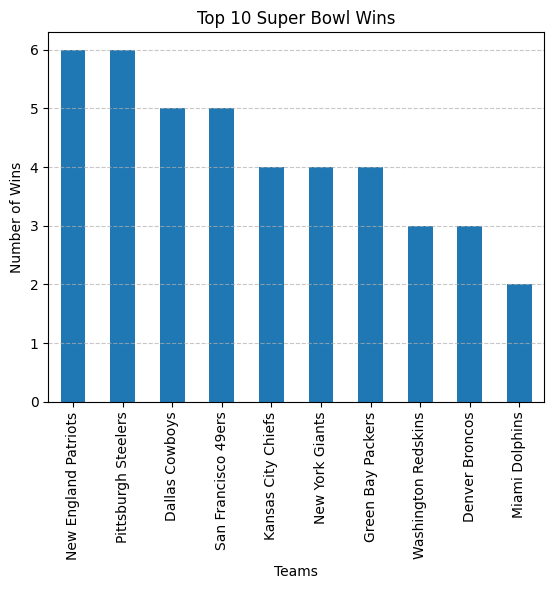

In [249]:
# finding & plotting top 5 teams according to number of superbowl wins
# Count the wins for each team and grab the top 10
top_teams = superbowl_games['winning_team'].value_counts().head(10)

# Plotting the wins
top_teams.plot(kind='bar')
plt.title('Top 10 Super Bowl Wins')
plt.xlabel('Teams')
plt.ylabel('Number of Wins')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

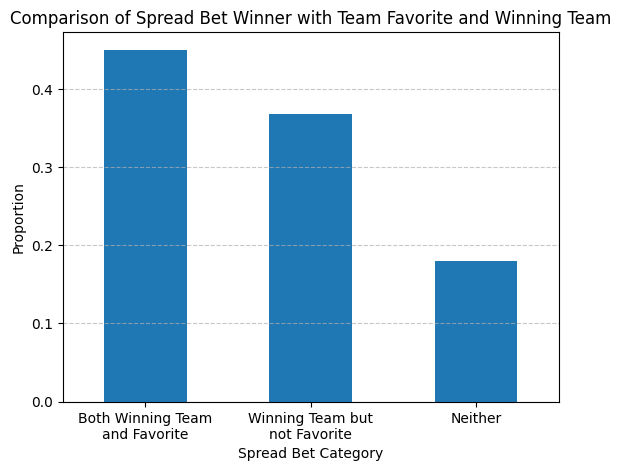

In [250]:
# plotting betting columns - first plot spread
# plot by how often the spread bet winner is the same as:
# 1. the team favorite
# 2. the winning team
# 3. both team favorite and winning team
# 4. neither

def categorize_relationship(row):
    is_favorite_winner = row['spread_bet_winner'] == row['team_favorite']
    is_winning_winner = row['spread_bet_winner'] == row['winning_team']
    
    if is_favorite_winner and is_winning_winner:
        return 'Both Winning Team\nand Favorite'
    elif is_winning_winner:
        return 'Winning Team but\nnot Favorite'
    else:
        return 'Neither'

betting_df['relationship_category'] = betting_df.apply(categorize_relationship, axis=1)

category_counts = betting_df['relationship_category'].value_counts()

# Normalize the counts to get the proportion of each category
category_proportions = category_counts / category_counts.sum()

# Plotting the categories
category_proportions.plot(kind='bar')
plt.title('Comparison of Spread Bet Winner with Team Favorite and Winning Team')
plt.xlabel('Spread Bet Category')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


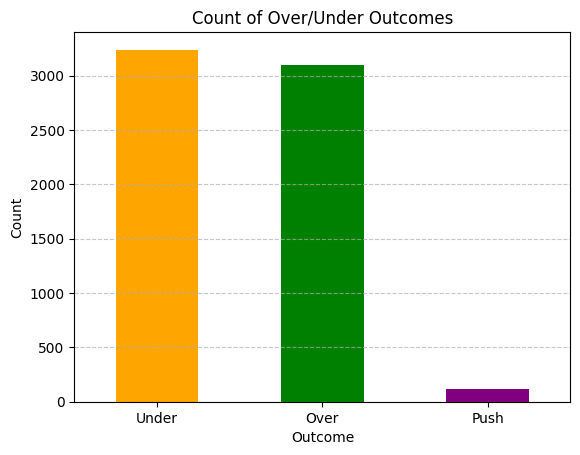

In [251]:
# plotting betting columns - plotting the over/under
# count up the number of over and under and compare

over_under_counts = betting_df['over_under_winner'].value_counts()

over_under_counts.plot(kind='bar', color=['orange', 'green', 'purple'])
plt.title('Count of Over/Under Outcomes')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Horizontal x-ticks for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Modeling: Analysis, Hypothesis Testing, & Machine Learning

In this section, we'll try to predict who will win the Superbowl based on their seasonal winrate and seasonal average point difference.

In [252]:

# load data
data = pd.read_csv('spreadspoke_scores.csv')

# get relevant columns for each game
game_data = data[['schedule_season', 'team_home', 'score_home', 'team_away', 'score_away']]

# get the winner for each game
game_data['winner'] = game_data.apply(lambda x: x['team_home'] if x['score_home'] > x['score_away'] else x['team_away'], axis=1)

# group by season and team to count wins and games played
team_season_summary = game_data.groupby(['schedule_season', 'team_home']).apply(lambda x: pd.Series({
    'total_wins': (x['winner'] == x['team_home']).sum(),
    'total_games': len(x)
})).reset_index()

team_season_summary.rename(columns={'team_home': 'team'}, inplace=True)

# calculate win rate for each team and season
team_season_summary['win_rate'] = team_season_summary['total_wins'] / team_season_summary['total_games']

# calculate the score diff for each game
game_data['score_difference'] = abs(game_data['score_home'] - game_data['score_away'])

# group by season and team to calculate average score difference
team_season_avg_score_diff = game_data.groupby(['schedule_season', 'team_home'])['score_difference'].mean().reset_index()

team_season_avg_score_diff.rename(columns={'team_home': 'team', 'score_difference': 'avg_score_difference'}, inplace=True)

# merge
team_season_stats = pd.merge(team_season_summary, team_season_avg_score_diff, on=['team', 'schedule_season'], how='inner')

team_season_stats.head()


/var/folders/lq/m6qymkcx1718frgl__z9ssrc0000gn/T/ipykernel_49606/2445318326.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/lq/m6qymkcx1718frgl__z9ssrc0000gn/T/ipykernel_49606/2445318326.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
/var/folders/lq/m6qymkcx1718frgl__z9ssrc0000gn/T/ipykernel_49606/2445318326.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

,schedule_season,team,total_wins,total_games,win_rate,avg_score_difference
0,1966,Atlanta Falcons,1,7,0.142857,21.285714
1,1966,Baltimore Colts,5,7,0.714286,15.428571
2,1966,Boston Patriots,4,7,0.571429,9.142857
3,1966,Buffalo Bills,4,8,0.500000,15.625000
4,1966,Chicago Bears,4,7,0.571429,9.142857


/Users/nicol/miniforge3/envs/cnn/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/Users/nicol/miniforge3/envs/cnn/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/Users/nicol/miniforge3/envs/cnn/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/Users/nicol/miniforge3/envs/cnn/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-define

Average Accuracy: 0.9660

Fold 1
Accuracy: 0.9649

Fold 2
Accuracy: 0.9589

Fold 3
Accuracy: 0.9707

Fold 4
Accuracy: 0.9736

Fold 5
Accuracy: 0.9619


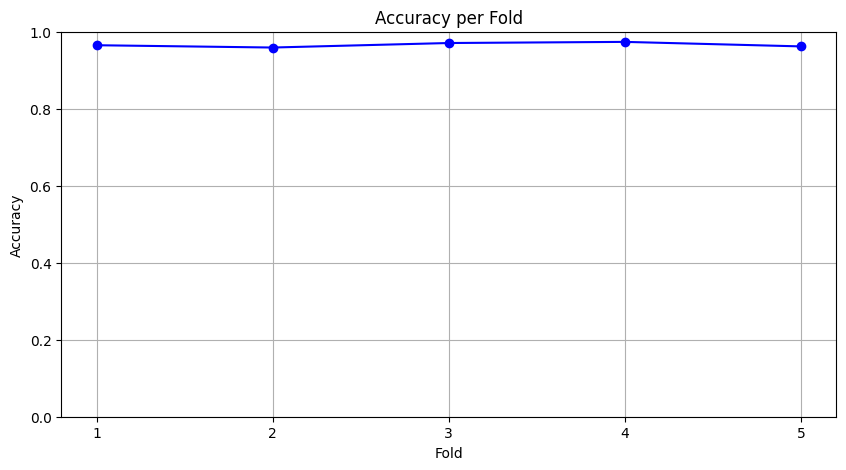

In [253]:
#logistic model to predict each team's probability of being in the superbowl

#find which teams made it to the super bowl each season (teams in the superbowl, keep those columns)
super_bowl_teams = data.loc[data['schedule_week'] == 'Superbowl', ['schedule_season', 'team_home']]

# merge that df with the team season stats df
team_season_stats['made_super_bowl'] = team_season_stats.apply(lambda x: 1 if (x['team'], x['schedule_season']) in zip(super_bowl_teams['team_home'], super_bowl_teams['schedule_season']) else 0, axis=1)

# set features (win rate and average score difference) and target var (made_super_bowl)
X = team_season_stats[['win_rate', 'avg_score_difference']]
y = team_season_stats['made_super_bowl']

# split the data into training and testing sets (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# initialize logistic regression model
model = LogisticRegression()

#k-fold cross-validation (5 fold)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# store results
accuracy_list = []
reports = []

# k-fold cross-validation in action!
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index] #for each split, set the train and test block
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # train the model
    model.fit(X_train, y_train)

    # predict based on the test fold
    predictions = model.predict(X_test)

    # check accuracy using the default sklearn accuracy metric
    accuracy = accuracy_score(y_test, predictions)
    report = classification_report(y_test, predictions, output_dict=True)

    # store results
    accuracy_list.append(accuracy)
    reports.append(report)

# calculate average accuracy
average_accuracy = np.mean(accuracy_list)
print(f'Average Accuracy: {average_accuracy:.4f}')

# print results per fold
for i in range(len(accuracy_list)):
    print(f"\nFold {i+1}")
    print(f"Accuracy: {accuracy_list[i]:.4f}")


#plot accuracy
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(accuracy_list) + 1), accuracy_list, marker='o', linestyle='-', color='b')
plt.title('Accuracy per Fold')
plt.xlabel('Fold')
plt.xticks(range(1,6))
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(True)
plt.show()